In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("Indian_Kids_Screen_Time.csv")
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


In [10]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [11]:
df.tail()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban
9711,15,Female,6.12,TV,True,0.33,Anxiety,Urban


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [14]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [58]:
# AVG screen time versus Gender
avg_screen_by_gender = (
    df.groupby("Gender")["Avg_Daily_Screen_Time_hr"].agg(["mean", "count"]).round(2).reset_index()
)
avg_screen_by_gender

,Gender,mean,count
0,Female,4.33,4770
1,Male,4.38,4942


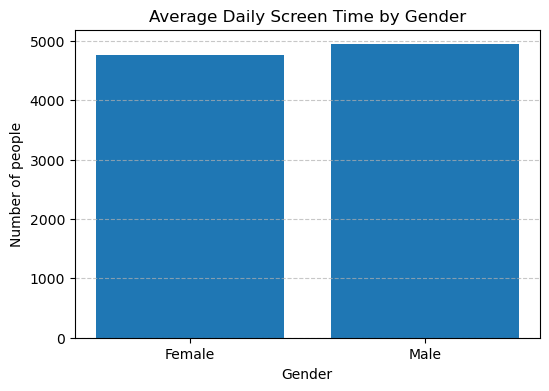

In [60]:
plt.figure(figsize=(6,4))
plt.bar(avg_screen_by_gender["Gender"], avg_screen_by_gender["count"])
plt.title("Average Daily Screen Time by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [43]:
# Average screen time by primary device
avg_screen_by_device = (
    df.groupby("Primary_Device")["Avg_Daily_Screen_Time_hr"].agg(["mean", "count"]).round(2).reset_index()
)
avg_screen_by_device

,Primary_Device,mean,count
0,Laptop,4.46,1433
1,Smartphone,4.39,4568
2,TV,4.29,2487
3,Tablet,4.23,1224


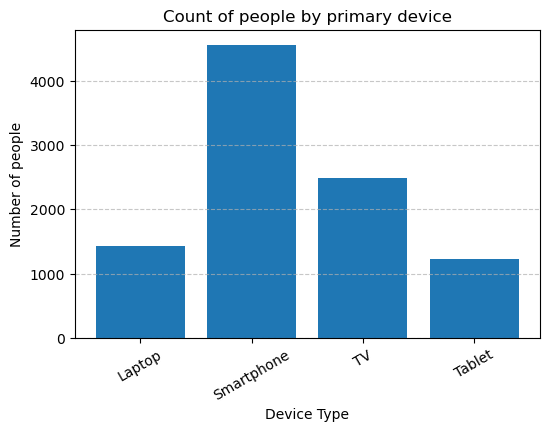

In [47]:
plt.figure(figsize=(6,4))
plt.bar(avg_screen_by_device["Primary_Device"], avg_screen_by_device["count"])
plt.title("Count of people by primary device")
plt.xlabel("Device Type")
plt.ylabel("Number of people")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [37]:
# Urban vs Rural Screen Time
urban_rural_screen = (
    df.groupby("Urban_or_Rural")["Avg_Daily_Screen_Time_hr"]
    .agg(["mean", "count"])
    .round(2)
    .reset_index()
)
urban_rural_screen

,Urban_or_Rural,mean,count
0,Rural,4.37,2861
1,Urban,4.34,6851


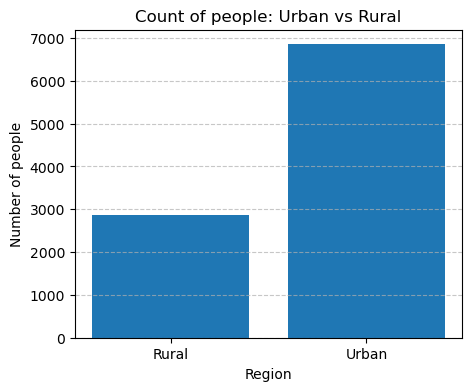

In [46]:
plt.figure(figsize=(5,4))
plt.bar(urban_rural_screen["Urban_or_Rural"], urban_rural_screen["count"])
plt.title("Count of people: Urban vs Rural")
plt.xlabel("Region")
plt.ylabel("Number of people")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [54]:
# Most Common Health Impacts for >4hr Screen Time
high_screen_health_issues = (
    df[df["Avg_Daily_Screen_Time_hr"] > 4]["Health_Impacts"]
    .value_counts()
    .head(5)
    .reset_index()
)
high_screen_health_issues.columns = ["Health_Impacts", "Count"]

high_screen_health_issues

,Health_Impacts,Count
0,Poor Sleep,1702
1,"Poor Sleep, Eye Strain",742
2,Eye Strain,457
3,"Poor Sleep, Anxiety",445
4,"Poor Sleep, Obesity Risk",357


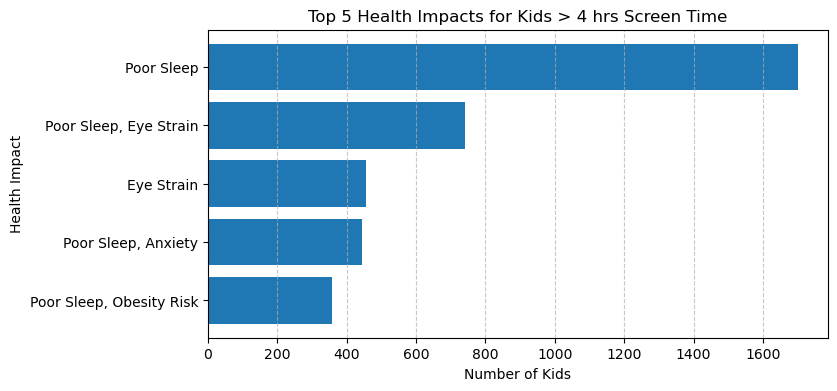

In [55]:
plt.figure(figsize=(8,4))
plt.barh(high_screen_health_issues["Health_Impacts"], high_screen_health_issues["Count"])
plt.title("Top 5 Health Impacts for Kids > 4 hrs Screen Time")
plt.xlabel("Number of Kids")
plt.ylabel("Health Impact")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [62]:
# summary
print("Screen Time Insights Summary")
print(f"• Average Screen Time by Gender:\n{avg_screen_by_gender}\n")
print(f"• Average Screen Time by Device:\n{avg_screen_by_device}\n")
print(f"• Urban vs Rural Screen Time:\n{urban_rural_screen}\n")
print(f"• Top Health Impacts for >4hr Screen Time:\n{high_screen_health_issues}")

Screen Time Insights Summary
• Average Screen Time by Gender:
   Gender  mean  count
0  Female  4.33   4770
1    Male  4.38   4942

• Average Screen Time by Device:
  Primary_Device  mean  count
0         Laptop  4.46   1433
1     Smartphone  4.39   4568
2             TV  4.29   2487
3         Tablet  4.23   1224

• Urban vs Rural Screen Time:
  Urban_or_Rural  mean  count
0          Rural  4.37   2861
1          Urban  4.34   6851

• Top Health Impacts for >4hr Screen Time:
             Health_Impacts  Count
0                Poor Sleep   1702
1    Poor Sleep, Eye Strain    742
2                Eye Strain    457
3       Poor Sleep, Anxiety    445
4  Poor Sleep, Obesity Risk    357
